### Importation des bibliothèques

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### Importation des données

In [3]:
df = pd.read_csv('creditcard.csv')

#### Visualisation des données

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Amount'].describe().T

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

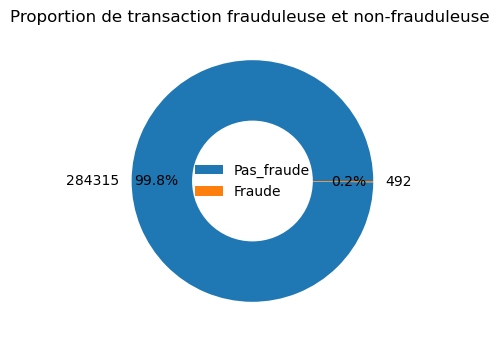

In [7]:
graphique = df["Class"].value_counts().reset_index()

labels = ["Pas_fraude", "Fraude"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
plt.pie(graphique["Class"],
        labels=graphique["Class"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proportion de transaction frauduleuse et non-frauduleuse ")
plt.legend(labels, loc="center", frameon=False)
plt.show();

In [9]:
y= df['Class']

In [8]:
X1= df.drop('Class',axis=1)
X= X1.drop('Time',axis=1)


## Avec undersampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
ros = RandomUnderSampler(sampling_strategy=0.3,random_state=1)
X_ros, y_ros = ros.fit_resample (X, y)


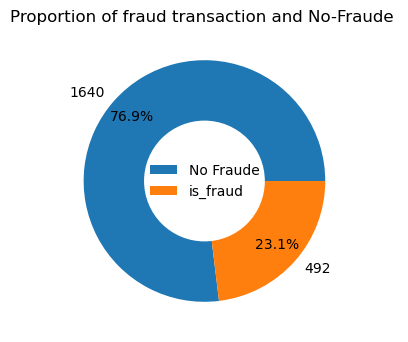

In [27]:
graphique = y_ros.value_counts().reset_index()

labels = ["No Fraude", "is_fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
plt.pie(graphique["Class"],
        labels=graphique["Class"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proportion of fraud transaction and No-Fraude ")
plt.legend(labels, loc="center", frameon=False)
plt.show();

In [28]:
from sklearn.model_selection import train_test_split


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=1)

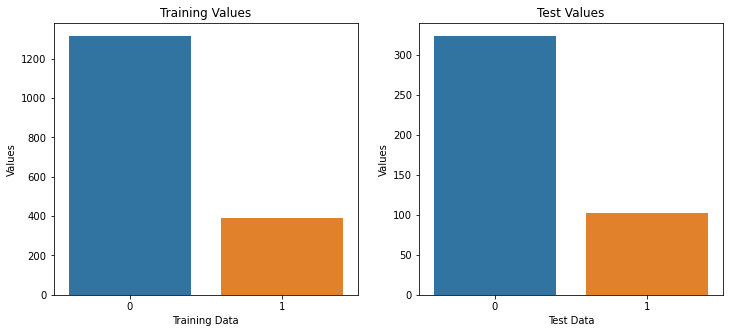

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate ([('Training', y_train), ('Test', y_test)]): 
    data=group[1].value_counts()
    sns.barplot(ax=ax[idx], x=data.index, y=data.values)
    ax[idx].set_title(f'{group[0]} Values')
    ax[idx].set_xlabel(f'{group[0]} Data')
    ax[idx].set_ylabel('Values')

In [146]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neural_network
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
clsf1 = AdaBoostClassifier(n_estimators=300)
clsf2 = neural_network.MLPClassifier(activation='relu', solver='sgd', alpha=1e-5 , hidden_layer_sizes=(20,20,20), random_state=1, max_iter=2000)
clsf4 = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=7)
estimators1 = [('rfc', clsf4 ), ('mlp', clsf2)]
clsf3 = VotingClassifier( estimators=estimators1, voting='soft')
#clsf5 = neural_network.MLPClassifier(activation='relu', solver='sgd', alpha=1e-5 , hidden_layer_sizes=(20,20,20), random_state=1, max_iter=2000)
estimators = [('vote', clsf3),('Adaboost', clsf1 )]


In [147]:
final_estimator = neural_network.MLPClassifier(activation='relu', solver='sgd', alpha=1e-5 , hidden_layer_sizes=(20,20,20), random_state=1, max_iter=2000)
clas = StackingClassifier( estimators=estimators, final_estimator=final_estimator)
#for clf, label in zip ([clsf1, clsf2, clsf3, clsf4, final_estimator, clas],['Adaboost','Neurone1','Voting','RFC','Neurone2','Empilement'] ):
 #   scores=cross_val_score(clf, X_ros, y_ros, scoring='accuracy', cv=5)
  #  print("accuracy : %0.2f (+\- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [148]:
val = clas.fit(X_train, y_train)

In [149]:
preds = val.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

#cv = RepeatedStratifiedKFold (n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(val, X_test, y_test, scoring='accuracy', cv=10)
score2=cross_val_score(val, X_train, y_train, scoring='accuracy', cv=10)

In [60]:
scores1

array([0.93023256, 0.93023256, 1.        , 0.95348837, 0.93023256,
       0.97674419, 0.97674419, 0.97619048, 0.95238095, 0.97619048])

In [61]:
score2

array([0.92397661, 0.96491228, 0.95906433, 0.94736842, 0.96491228,
       0.95882353, 0.98235294, 0.96470588, 0.97647059, 0.97058824])

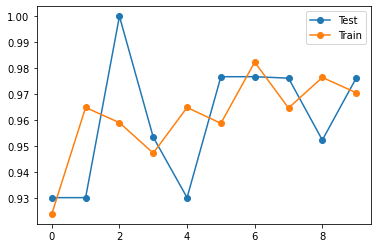

In [62]:
plt.plot(scores1, '-o', label = 'Test')
plt.plot(score2, '-o', label = 'Train')
plt.legend()

In [63]:
from numpy import mean
a = scores1.mean()
b= score2.mean()
print (a)
print (b)

0.9602436323366556
0.9613175094599244


In [138]:
val.score(X_test, y_test)

0.9718969555035128

In [150]:
train_score = val.score(X_train, y_train)
print("Le score en train est {}".format(train_score))
test_score = val.score(X_test, y_test)
print("Le score en test est {}".format(test_score))


Le score en train est 0.967741935483871
Le score en test est 0.9672131147540983


In [151]:
from sklearn.metrics import classification_report
print( classification_report (y_test,preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       324
           1       1.00      0.86      0.93       103

    accuracy                           0.97       427
   macro avg       0.98      0.93      0.95       427
weighted avg       0.97      0.97      0.97       427



In [132]:
from sklearn import metrics
metrics.f1_score(y_test, preds, average='weighted', labels=np.unique(preds))

0.9713518494475881

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

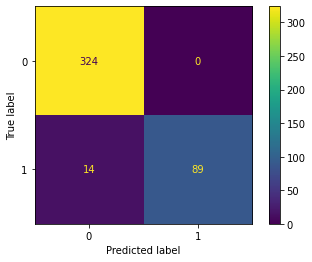

In [152]:
cm = confusion_matrix(y_test, preds, labels=clas.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clas.classes_)
disp.plot();

In [80]:
clsf1.fit(X_train, y_train)
clsf2.fit(X_train, y_train)
clsf3.fit(X_train, y_train)
clsf4.fit(X_train, y_train)

final_estimator.fit(X_train, y_train)
clas.fit(X_train, y_train)

KeyboardInterrupt: 

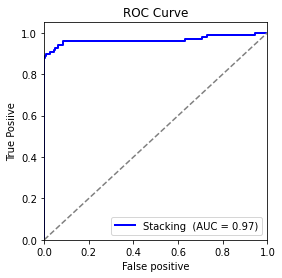

In [142]:
for clf, label in zip ([ clas],['Stacking'] ):
    y_preds_ros = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score for non-oversampled model
    fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_preds_ros)
    auc_non_oversampled = roc_auc_score(y_test, y_preds_ros)

# Plot ROC curve for non-oversampled model
plt.figure(figsize=(4, 4))
plt.plot(fpr_non_oversampled, tpr_non_oversampled, color='blue', lw=2, label= '%s' f'  (AUC = {auc_non_oversampled:.2f})' %label)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive')
plt.ylabel('True Posiive')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 1640), (1, 492)]


In [37]:
import joblib
joblib.dump(clas, "Model_combining.joblib")

['Model_combining.joblib']

In [143]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from numpy import std, mean
kfold = StratifiedKFold(n_splits=10)

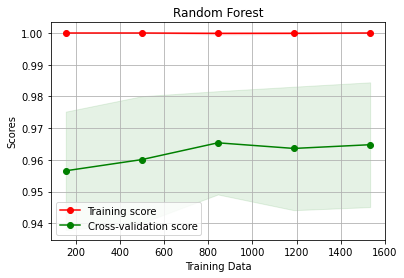

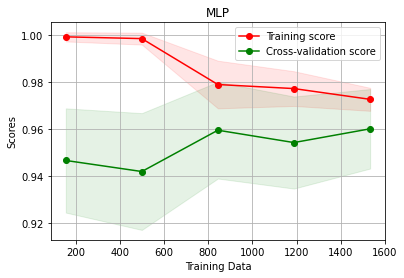

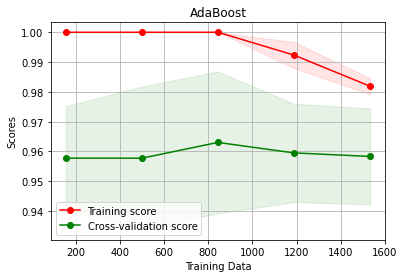

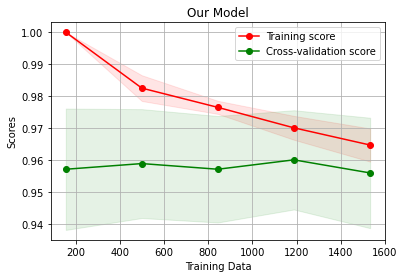

In [144]:
def plot_learning_curve(estimator, titre, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(titre)
   
    plt.xlabel("Training Data")
    plt.ylabel("Scores")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(RandomForestClassifier(),"Random Forest",X_train,y_train,cv=kfold)
g = plot_learning_curve(neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5 , hidden_layer_sizes=(20), random_state=1, max_iter=1000),"MLP",X_train,y_train,cv=kfold)
g = plot_learning_curve(AdaBoostClassifier(),"AdaBoost",X_train,y_train,cv=kfold)
g = plot_learning_curve(clas,"Our Model",X_train,y_train,cv=kfold)


## Avec OverSampling

In [87]:
from imblearn.over_sampling import RandomOverSampler

In [88]:
ros = RandomOverSampler(sampling_strategy=0.3,random_state=42)
X_ros, y_ros = ros.fit_resample (X, y)

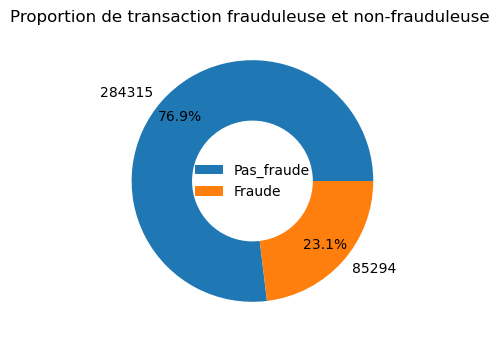

In [89]:
graphique = y_ros.value_counts().reset_index()

labels = ["Pas_fraude", "Fraude"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
plt.pie(graphique["Class"],
        labels=graphique["Class"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proportion de transaction frauduleuse et non-frauduleuse ")
plt.legend(labels, loc="center", frameon=False)
plt.show();

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neural_network
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std 
from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
clsf1 = AdaBoostClassifier(n_estimators=100)
clsf2 = neural_network.MLPClassifier(solver='sgd', alpha=1e-5 , hidden_layer_sizes=(20,20,20), random_state=1, max_iter=2000)
estimators1 = [('Adaboost', clsf1 ), ('mlp', clsf2)]
clsf3 = VotingClassifier( estimators=estimators1, voting='soft')
clsf4 = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=1)
clsf5 = neural_network.MLPClassifier(solver='sgd', alpha=1e-5 , hidden_layer_sizes=(20,20,20), random_state=1, max_iter=2000)
estimators = [('vot', clsf3),('rfc', clsf4 ), ('mlp', clsf5)]
final_estimator = neural_network.MLPClassifier(activation='relu',solver='sgd', alpha=1e-5 , hidden_layer_sizes=(20,20,20), max_iter= 2000,learning_rate_init=0.1, random_state=1)
clas = StackingClassifier( estimators=estimators, final_estimator=final_estimator)

In [93]:
val = clas.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
preds = val.predict(X_test)

In [ ]:
val.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
print( classification_report (y_test,preds))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [ ]:
cm = confusion_matrix(y_test, preds, labels=clas.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clas.classes_)
disp.plot();

In [ ]:
y_preds_ros = clas.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score for non-oversampled model
fpr_non_oversampled, tpr_non_oversampled, thresholds_non_oversampled = roc_curve(y_test, y_preds_ros)
auc_non_oversampled = roc_auc_score(y_test, y_preds_ros)

# Plot ROC curve for non-oversampled model
plt.figure(figsize=(4, 4))
plt.plot(fpr_non_oversampled, tpr_non_oversampled, color='orange', lw=2, label=f' ROC Curve (AUC = {auc_non_oversampled:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Faux Positif')
plt.ylabel('Vrai Positif')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

### Neurones


In [53]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy


In [54]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(2, activation='softmax')
])

In [55]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 29)                870       
                                                                 
 dense_6 (Dense)             (None, 20)                600       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 2)                 42        
                                                                 
Total params: 2352 (9.19 KB)
Trainable params: 2352 (9.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
undersample_model.compile(SGD(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
val=undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
55/55 - 2s - loss: 0.9185 - accuracy: 0.7911 - val_loss: 0.5277 - val_accuracy: 0.8739 - 2s/epoch - 29ms/step
Epoch 2/10
55/55 - 0s - loss: 0.6039 - accuracy: 0.8607 - val_loss: 0.4837 - val_accuracy: 0.9032 - 215ms/epoch - 4ms/step
Epoch 3/10
55/55 - 0s - loss: 0.4595 - accuracy: 0.8871 - val_loss: 0.4028 - val_accuracy: 0.9120 - 247ms/epoch - 4ms/step
Epoch 4/10
55/55 - 0s - loss: 0.3847 - accuracy: 0.9142 - val_loss: 0.3305 - val_accuracy: 0.9384 - 250ms/epoch - 5ms/step
Epoch 5/10
55/55 - 0s - loss: 0.3501 - accuracy: 0.9113 - val_loss: 0.3003 - val_accuracy: 0.9296 - 251ms/epoch - 5ms/step
Epoch 6/10
55/55 - 0s - loss: 0.3644 - accuracy: 0.8996 - val_loss: 0.3337 - val_accuracy: 0.9003 - 251ms/epoch - 5ms/step
Epoch 7/10
55/55 - 0s - loss: 0.5710 - accuracy: 0.8666 - val_loss: 0.3652 - val_accuracy: 0.8798 - 217ms/epoch - 4ms/step
Epoch 8/10
55/55 - 0s - loss: 0.3841 - accuracy: 0.8629 - val_loss: 0.3695 - val_accuracy: 0.8768 - 233ms/epoch - 4ms/step
Epoch 9/10
55/55 -

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [29]:
 #undersample_predictions = undersample_model.predict(X_test)

In [45]:
undersample_predictions =undersample_model.predict(X_test, batch_size=200, verbose=0) 
classes_x=np.argmax(undersample_predictions,axis=1)